In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
import shapely.geometry as geom
cc = plt.get_cmap(lut=5)

In [156]:
import seaborn as sns

# 1. Current Relief

In [87]:
relief = gpd.GeoDataFrame.from_file('/Users/nnhoucheng/Taxi_Relief_Stand_Spark/relief_stands_23July.geojson')
relief.crs = from_epsg(4326)
relief = relief.to_crs(epsg=2263)
relief.head()

Location  RS_ID  \
0  Park Avenue  between E 135th St and E 138th St...      1   
1        Fourth Avenue between Third St and Sixth St      2   
2     North 6th Street between Berry St and Wythe St      3   
3  Utica Avenue between Winthrop St and Rutland Blvd      4   
4       Tenth Avenue between W 26th St and W 28th St      5   

                                      geometry id  
0  POINT (1003649.656093318 235231.6575341009)  0  
1  POINT (987989.0581599051 184525.0344483966)  1  
2  POINT (995263.0261621346 201077.5449635245)  2  
3  POINT (1003344.285750262 179557.4198820665)  3  
4  POINT (983613.3107355811 212629.7016535722)  4

In [89]:
relief_count = pd.read_csv('usage_2015_July23.csv')
relief_count.head()

relief_stand_idx    date  car_usage  time_usage
0                 0  150101         78      946797
1                 0  150102        101      815923
2                 0  150103         69      859396
3                 0  150104         77      777638
4                 0  150105         84      609229

In [90]:
table = relief_count.groupby('relief_stand_idx').sum().iloc[:,-2:]
table = table.reset_index()
table.head()

relief_stand_idx  car_usage  time_usage
0                 0      28019   223680668
1                 1      10318    97877123
2                 2        107      470913
3                 3        114      573550
4                 4       2891    13167986

## 1.1 Usage

In [91]:
table.sort_values('car_usage', ascending=False).head(5)

relief_stand_idx  car_usage  time_usage
44                44      36446   360521869
0                  0      28019   223680668
26                26      24273   101983641
20                20      12455    53228327
38                38      11182    90470224

In [93]:
car_top5_idx = table.sort_values('car_usage', ascending=False).head(5).relief_stand_idx.values
car_top5_idx

array([44,  0, 26, 20, 38])

In [92]:
table.sort_values('time_usage', ascending=False).head(5)

relief_stand_idx  car_usage  time_usage
44                44      36446   360521869
0                  0      28019   223680668
34                34       9930   108704620
26                26      24273   101983641
1                  1      10318    97877123

In [95]:
time_top5_idx = table.sort_values('time_usage', ascending=False).head(5).relief_stand_idx.values
time_top5_idx

array([44,  0, 34, 26,  1])

In [52]:
xsize = 30
ysize = 13
xpos = range(31)
xlabel = [('0'+str(i+1))[-2:] for i in xpos]
image_path = 'image/'

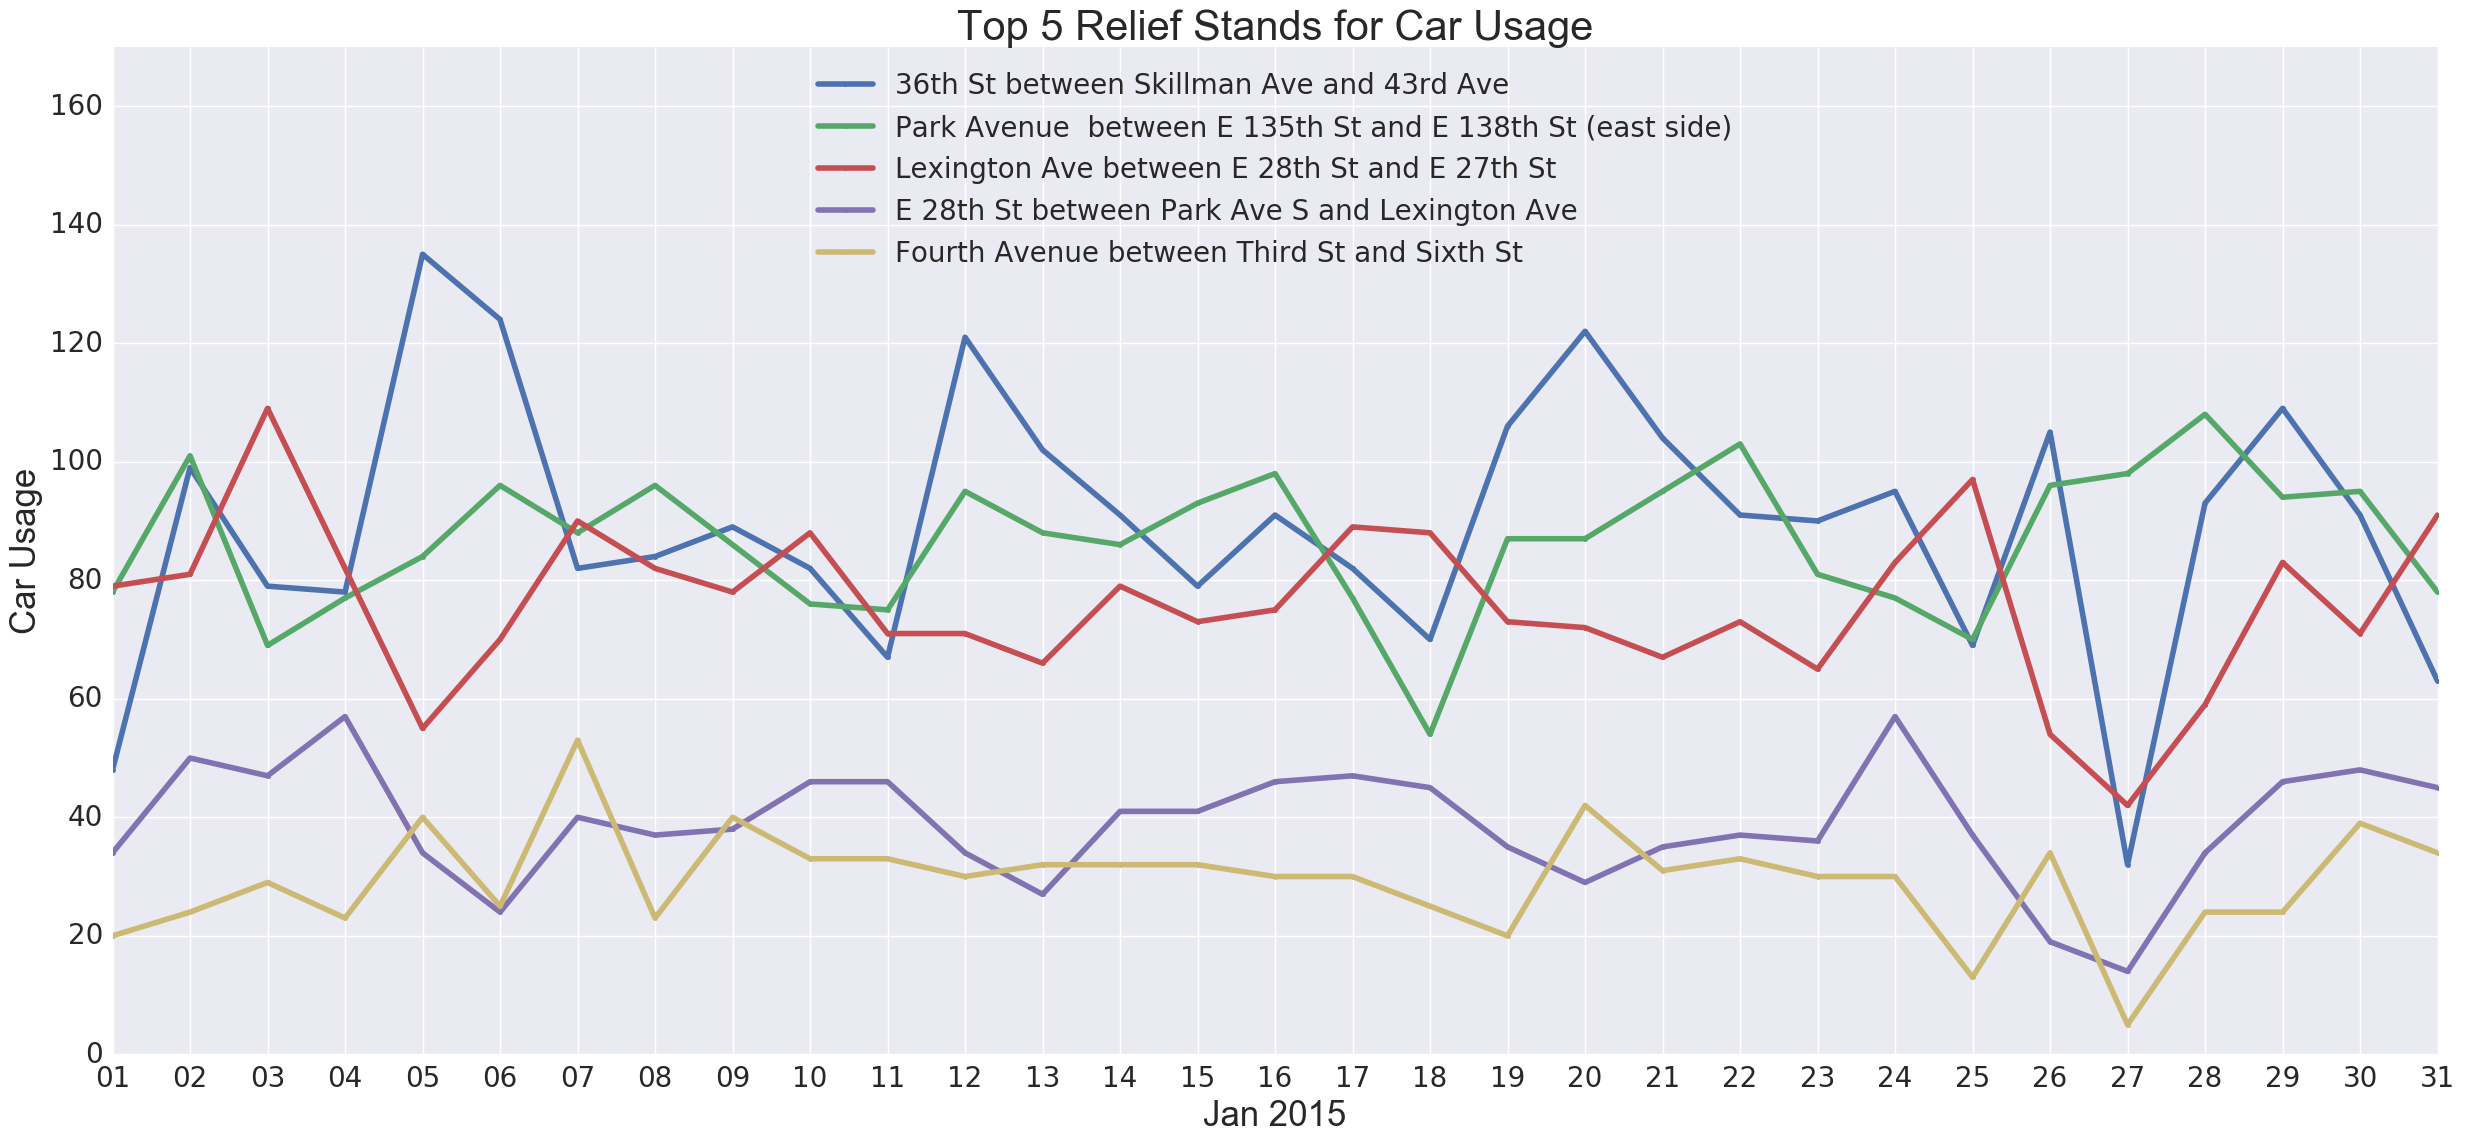

In [58]:
fig1, ax1 = plt.subplots(num=0, figsize=[xsize, ysize])
for idx in car_top5_idx:
    ax1.plot(xpos, relief_count.loc[relief_count.relief_stand_idx == idx, 'car_usage'],
             '.-', lw=4,
             label=relief.loc[idx, 'location'])
plt.xticks(xpos, xlabel, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 170)
plt.ylabel('Car Usage', fontsize=25)
plt.xlabel('Jan 2015', fontsize=25)
plt.title('Top 5 Relief Stands for Car Usage', fontsize=30)
plt.legend(loc=9,fontsize=20)
fig1.savefig(image_path+'Top5_Cars_201501.png', bbox_inches='tight')
plt.show()    

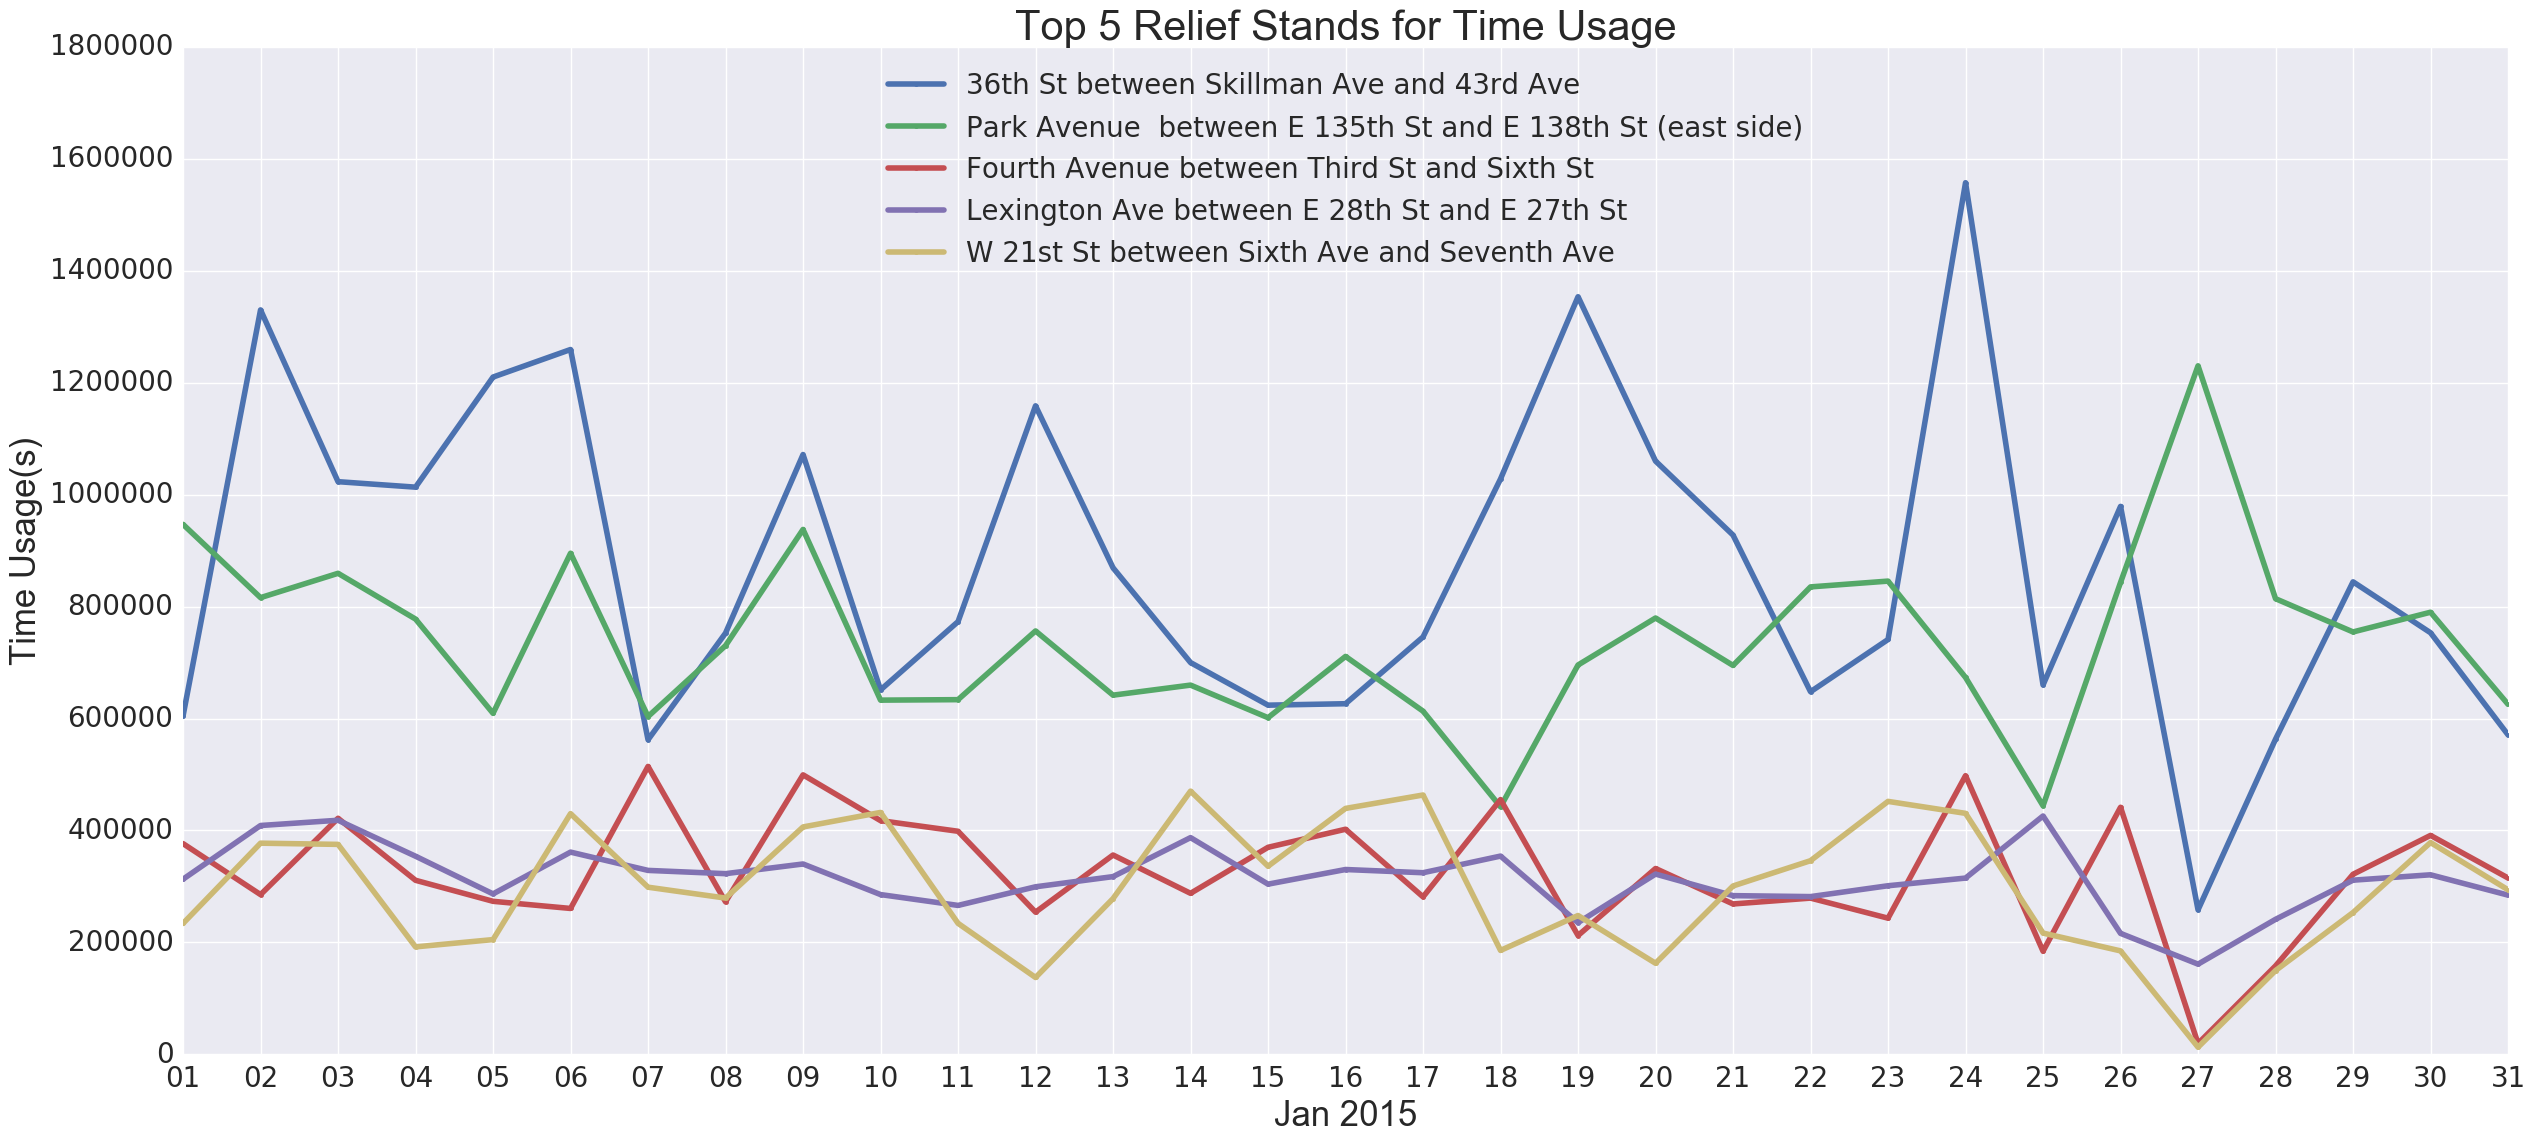

In [80]:
cc_ = []
fig2, ax2 = plt.subplots(num=1, figsize=[xsize, ysize])
for idx in time_top5_idx:
    ax2.plot(xpos, relief_count.loc[relief_count.relief_stand_idx == idx, 'time_usage'],
             '.-', lw=4,
             label=relief.loc[idx, 'location'])
    #cc_.append(axx[0].get_color())
plt.xticks(xpos, xlabel, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 1800000)
plt.ylabel('Time Usage(s)', fontsize=25)
plt.xlabel('Jan 2015', fontsize=25)
plt.title('Top 5 Relief Stands for Time Usage', fontsize=30)
plt.legend(loc=9,fontsize=20)
fig2.savefig(image_path+'Top5_Time_201501.png', bbox_inches='tight')
plt.show() 

## 1.2 Geoplot

In [191]:
ct_path = '/Users/nnhoucheng/Desktop/NYU/Capstone/ct_shape/ct_shape.shp'
ct_shape = gpd.GeoDataFrame.from_file(ct_path)
ct_shape_ = ct_shape[ct_shape.BoroName != 'Staten Island']

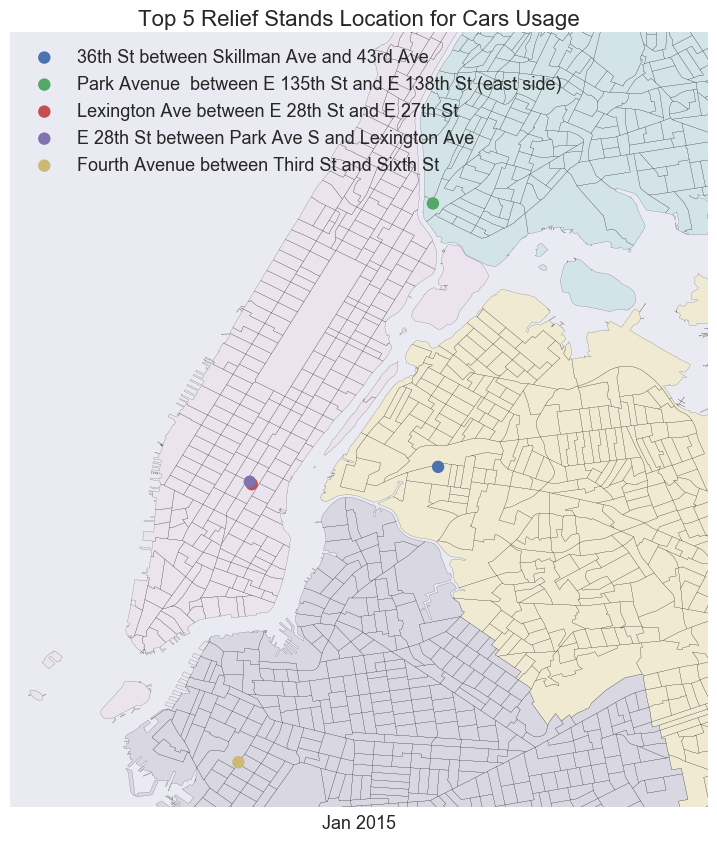

In [75]:
fig3, ax3 = plt.subplots(num=2, figsize=(9,10))
ct_shape_.plot(ax=ax3, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

for k,idx in enumerate(car_top5_idx):
    p = relief.loc[idx, 'geometry']
    ax3.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax3.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax3.set_title('Top 5 Relief Stands Location for Cars Usage', fontsize=16)
plt.xlim(-74.053, -73.85)
plt.ylim(40.662, 40.855)
ax3.set_xlabel('Jan 2015', fontsize=13)
plt.xticks([])
plt.yticks([])
fig3.savefig(image_path+'Top5_Cars_Usage_Location.png', bbox_inches='tight')
plt.show()

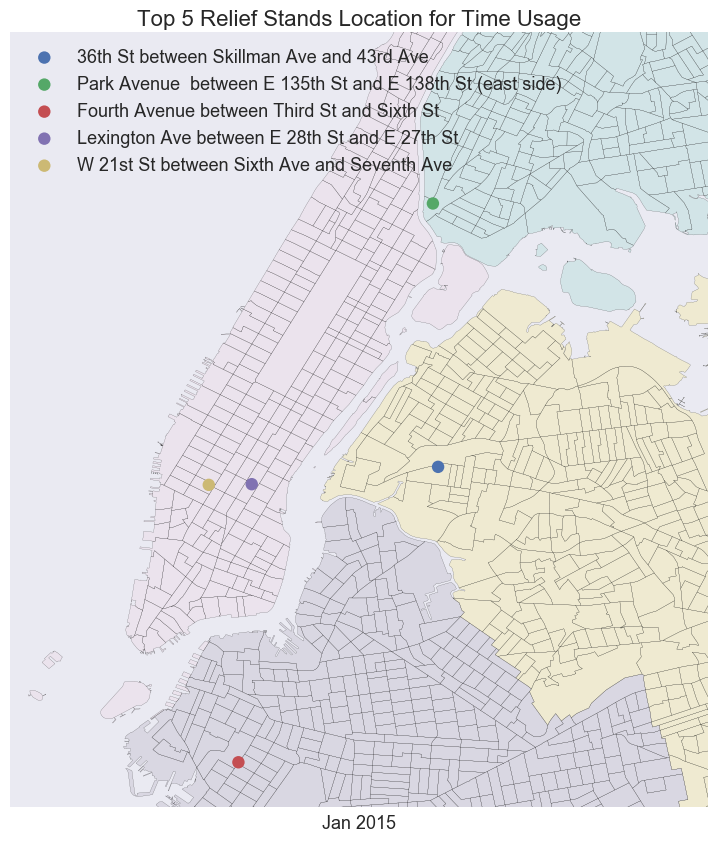

In [79]:
fig4, ax4 = plt.subplots(num=3, figsize=(9,10))
ct_shape_.plot(ax=ax4, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

for k,idx in enumerate(time_top5_idx):
    p = relief.loc[idx, 'geometry']
    ax4.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax4.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax4.set_title('Top 5 Relief Stands Location for Time Usage', fontsize=16)
plt.xlim(-74.053, -73.85)
plt.ylim(40.662, 40.855)
ax4.set_xlabel('Jan 2015', fontsize=13)
plt.xticks([])
plt.yticks([])
fig4.savefig(image_path+'Top5_Time_Usage_Location.png', bbox_inches='tight')
plt.show()

# 2. Sample plot for trajectory
** vehicle ID:** V105336832

** date:** 2015-01-02

In [2]:
relief = gpd.GeoDataFrame.from_file('/Users/nnhoucheng/Taxi_Relief_Stand_Spark/relief_stands_23July.geojson')
relief.crs = from_epsg(4326)
relief = relief.to_crs(epsg=2263)

In [82]:
relief.head()

Location  RS_ID  \
0  Park Avenue  between E 135th St and E 138th St...      1   
1        Fourth Avenue between Third St and Sixth St      2   
2     North 6th Street between Berry St and Wythe St      3   
3  Utica Avenue between Winthrop St and Rutland Blvd      4   
4       Tenth Avenue between W 26th St and W 28th St      5   

                                      geometry id  
0  POINT (1003649.656093318 235231.6575341009)  0  
1  POINT (987989.0581599051 184525.0344483966)  1  
2  POINT (995263.0261621346 201077.5449635245)  2  
3  POINT (1003344.285750262 179557.4198820665)  3  
4  POINT (983613.3107355811 212629.7016535722)  4

In [3]:
sample = pd.read_csv('sample.csv', dtype={'time': str})

In [4]:
def trans(timestamp):
    return int(timestamp[:2])*3600 + int(timestamp[2:4])*60 + int(timestamp[4:])
    
def trans_(time):
    hour = time//3600
    time = time%3600
    minute = time//60
    second = time%60
    return ('0'+str(hour))[-2:] + ('0'+str(minute))[-2:] + ('0'+str(second))[-2:]

def checkspeed(row1, row2, speed_threshold = 10*3.28084/120):
    speed = 1.*np.sqrt((row1[1]-row2[1])**2 + (row1[2]-row2[2])**2) / (row2[0]-row1[0])
    if speed <= speed_threshold:
        return True
    else:
        return False  

In [5]:
sample_ = sample.loc[sample.num_customer == 0, ['time', 'longitude', 'latitude']]
sample_.time = sample_.time.apply(trans)
sample_.head()

time  longitude  latitude
6    892     986431    212614
14  1801     995468    218895
15  1921     995619    218905
16  2042     995672    218861
24  2968     987331    201388

In [6]:
idles = []
time_thresold = 30*60 # time thershold
flag = False
start = 0

idxs = sample_.index.values
for i,idx in enumerate(idxs):
    if i == 0:
        continue
    ff = checkspeed(sample_.iloc[i-1], sample_.iloc[i])
    if ff and not flag:
        flag = True
        start = i-1
    elif not ff and flag:
        flag = False
        time = sample_.iloc[i-1][0] - sample_.iloc[start][0]
        if time >= time_thresold:
            idles.append(idxs[start:i])

/Users/nnhoucheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars


In [6]:
idles

[array([58, 59, 60]),
 array([117, 118]),
 array([138, 139, 140, 141, 142, 143, 144, 145, 146]),
 array([278, 279, 280]),
 array([403, 404])]

In [45]:
sample.loc[idles[4]]

time  longitude  latitude  num_customer  status
403  222825     985383    201908             0      31
404  230548     985379    201967             0      31

In [35]:
sample['status'] = 0

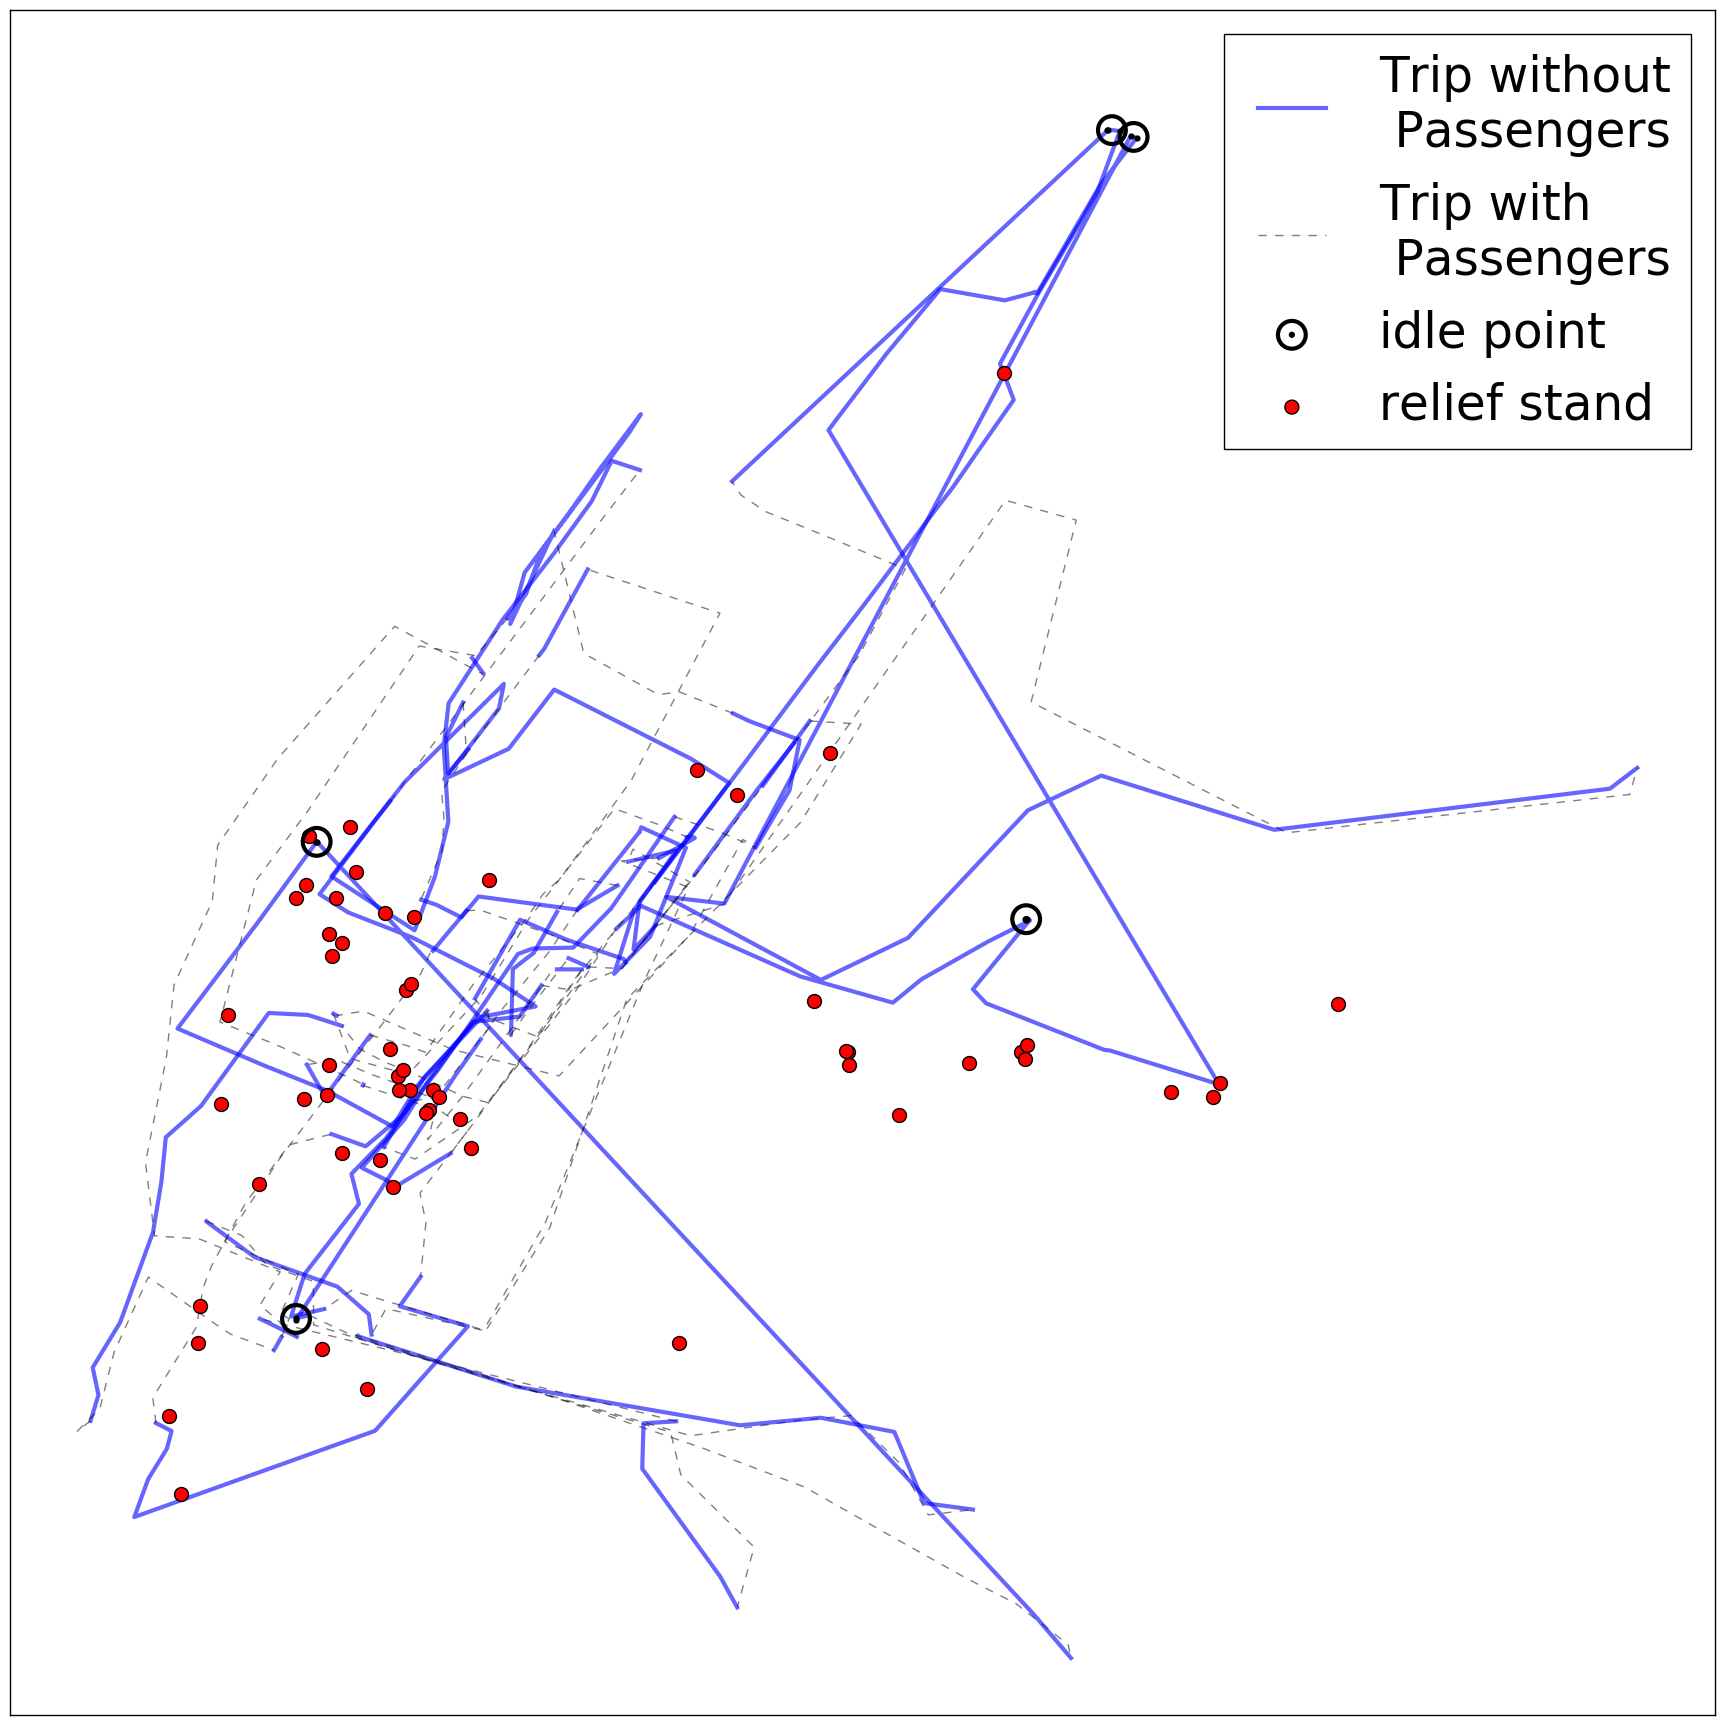

In [20]:
fig5, ax5 = plt.subplots(num=4, figsize=(22,22))

status = 1
linec = []

for i in sample.index.values:
    if i == 0:
        cnum = sample.loc[i,'num_customer']
        ii = 0
        continue
    if sample.loc[i,'num_customer'] != cnum:
        if cnum == 0:
            ax5.plot(sample.loc[ii:i,'longitude'], sample.loc[ii:i,'latitude'], label=status,\
                     alpha=0.6, linewidth=3)
            linec.append(status)
            sample.loc[ii:i, 'status'] = status
            status += 1
        else:
            ax5.plot(sample.loc[ii:i,'longitude'], sample.loc[ii:i,'latitude'], '--',\
                     alpha=0.5, linewidth=1)
            linec.append(0)
        cnum = sample.loc[i,'num_customer']
        ii = i

if cnum == 0:
    ax5.plot(sample.loc[ii:i,'longitude'], sample.loc[ii:i,'latitude'], label=status,\
            alpha=0.6, linewidth=3)
    sample.loc[ii:i, 'status'] = status
    linec.append(status)
    status += 1
else:
    ax5.plot(sample.loc[ii:i,'longitude'], sample.loc[ii:i,'latitude'], '--',\
             alpha=0.5, linewidth=1)
    linec.append(0)

#cmap = plt.cm.rainbow(np.linspace(0,1,status))
linep = None
linenp = None
for i,line in enumerate(ax5.lines):
    if linec[i] == 0:
        line.set_color('black')
        line.set_label(None)
        if linep == None:
            linep = line
    else:
        #line.set_color(cmap[linec[i]])
        line.set_color('blue')
        if linenp == None:
            linenp = line

cmap = plt.cm.plasma(np.linspace(0,1,len(idles)+2))
scs = []
sc = []
for i,idxs in enumerate(idles):
    s = ax5.scatter(sample.loc[idxs,'longitude'], sample.loc[idxs,'latitude'], c='black', label=None,\
                    s=20, linewidths=0, zorder=5)
    scs.append(s)
    s = ax5.scatter(np.mean(sample.loc[idxs,'longitude']), np.mean(sample.loc[idxs,'latitude']),\
                    s=400, facecolor='none', edgecolor='black', linewidths=3, zorder=10)
    sc.append(s)    
    
for i in relief.index.values:
    p = relief.loc[i, 'geometry']
    ss = ax5.scatter(p.x, p.y, c='red', s=100, zorder=6)    
    
#leg = ax5.legend(loc=1, fontsize=18)
#leg.set_title('Trip without\n Passengers', prop={'size':20})
leg2 = plt.legend([linenp, linep, (sc[0],scs[0]), ss], ['Trip without\n Passengers', 'Trip with\n Passengers',
                                       'idle point', 'relief stand'], 
                  loc=1, scatterpoints=1, fontsize=35)
#leg2.set_title('Idle points\n Identified\n  in Trip', prop={'size':25})
#plt.gca().add_artist(leg)

ax5.set_xlim(978000, 1022000)
ax5.set_ylim(188000, 248000)
plt.xticks([])
plt.yticks([])
#ax5.set_title('Trajectory for V105336832 \nin 2015-01-02', fontsize=40)
fig5.savefig('image/trajectory.png', bbox_inches='tight')
plt.show()

# 3. One Year Usage

In [101]:
relief.head()

location  \
0         Thompson St between Grand St and Sixth Ave   
1  Park Avenue  between E 135th St and E 138th St...   
2  Park Avenue  between E 135th St and E 138th St...   
3        Fourth Avenue between Third St and Sixth St   
4     North 6th Street between Berry St and Wythe St   

                               geometry  
0   POINT (-74.00482100000001 40.72222)  
1          POINT (-73.929918 40.812311)  
2          POINT (-73.929918 40.812311)  
3          POINT (-73.986521 40.673155)  
4  POINT (-73.96027100000001 40.718581)

In [140]:
relief_count = pd.read_csv('usage_2015.csv', dtype={'date': str})
relief_count.head()

relief_stand_idx    date  car_usage  time_usage
0                 1  150101         78      946797
1                 1  150102        101      815923
2                 1  150103         69      859396
3                 1  150104         77      777638
4                 1  150105         84      609229

In [98]:
table = relief_count.groupby('relief_stand_idx').sum().iloc[:,-2:]
table = table.reset_index()
table.head()

relief_stand_idx  car_usage  time_usage
0                 1      28019   223680668
1                 3      10302    97717544
2                 4        107      470913
3                 5        114      573550
4                 6       2891    13167986

In [106]:
set(relief.index.values) - set(table.relief_stand_idx.values)

{0, 2}

In [116]:
add_ = pd.DataFrame([[0,0,0], [2,0,0]], columns=table.columns.values)
table_ = table.append(add_, ignore_index=True)

In [114]:
table_.sort_values('car_usage', ascending=False).head(8)

relief_stand_idx  car_usage  time_usage
44                47      36443   360478302
0                  1      28019   223680668
28                31      24289   102072217
22                24      12446    53198176
39                42      11174    90391200
1                  3      10302    97717544
35                38       9924   108691609
29                32       5117    23723780

In [107]:
car_top8_idx = [47,1,31,24,42,3,38,32]

In [206]:
table_.sort_values('car_usage', ascending=True).head(6)

relief_stand_idx  car_usage  time_usage
61                 2          0           0
60                 0          0           0
50                53          3       19984
17                19         55      554095
47                50         88     1197774
51                54        102     1088003

In [208]:
car_last5_idx = [0,53,19,50,54]

In [177]:
table_.sort_values('time_usage', ascending=False).head(8)

relief_stand_idx  car_usage  time_usage
44                47      36443   360478302
0                  1      28019   223680668
35                38       9924   108691609
28                31      24289   102072217
1                  3      10302    97717544
39                42      11174    90391200
49                52       4262    54938933
22                24      12446    53198176

In [178]:
time_top8_idx = [47,1,38,31,3,42,52,24]

In [209]:
table_.sort_values('time_usage', ascending=True).head(6)

relief_stand_idx  car_usage  time_usage
61                 2          0           0
60                 0          0           0
50                53          3       19984
2                  4        107      470913
17                19         55      554095
3                  5        114      573550

In [210]:
time_last5_idx = [0,53,4,19,5]

In [214]:
relief.loc[5]

location    Utica Avenue between Winthrop St and Rutland Blvd
geometry                           POINT (-73.931179 40.6595)
Name: 5, dtype: object

In [132]:
image_path = 'image/'

In [148]:
all_car_top8 = []
for idx in car_top8_idx:
    tt = relief_count.loc[relief_count.relief_stand_idx == idx, ['date','car_usage']]
    tt['month'] = tt.date.apply(lambda x: int(x[2:4]))
    tt = tt.groupby('month').sum()
    tt.rename(columns={'car_usage': 'car_usage_'+str(idx)}, inplace=True)
    all_car_top8.append(tt)
df_car_top8 = pd.concat(all_car_top8, axis=1)

In [175]:
m = [31,28,31,30,31,30,31,31,30,31,30,31]
m = [sum(m[:i]) for i in range(13)]
m_ = [(m[i]+m[i+1])//2 for i in range(12)]
xtpos = sorted(m+m_)
xtlab = ['','Jan','','Feb','','Mar','','Apr','','May','','Jun',
         '','Jul','','Aug','','Sep','','Oct','','Nov','','Dec','']

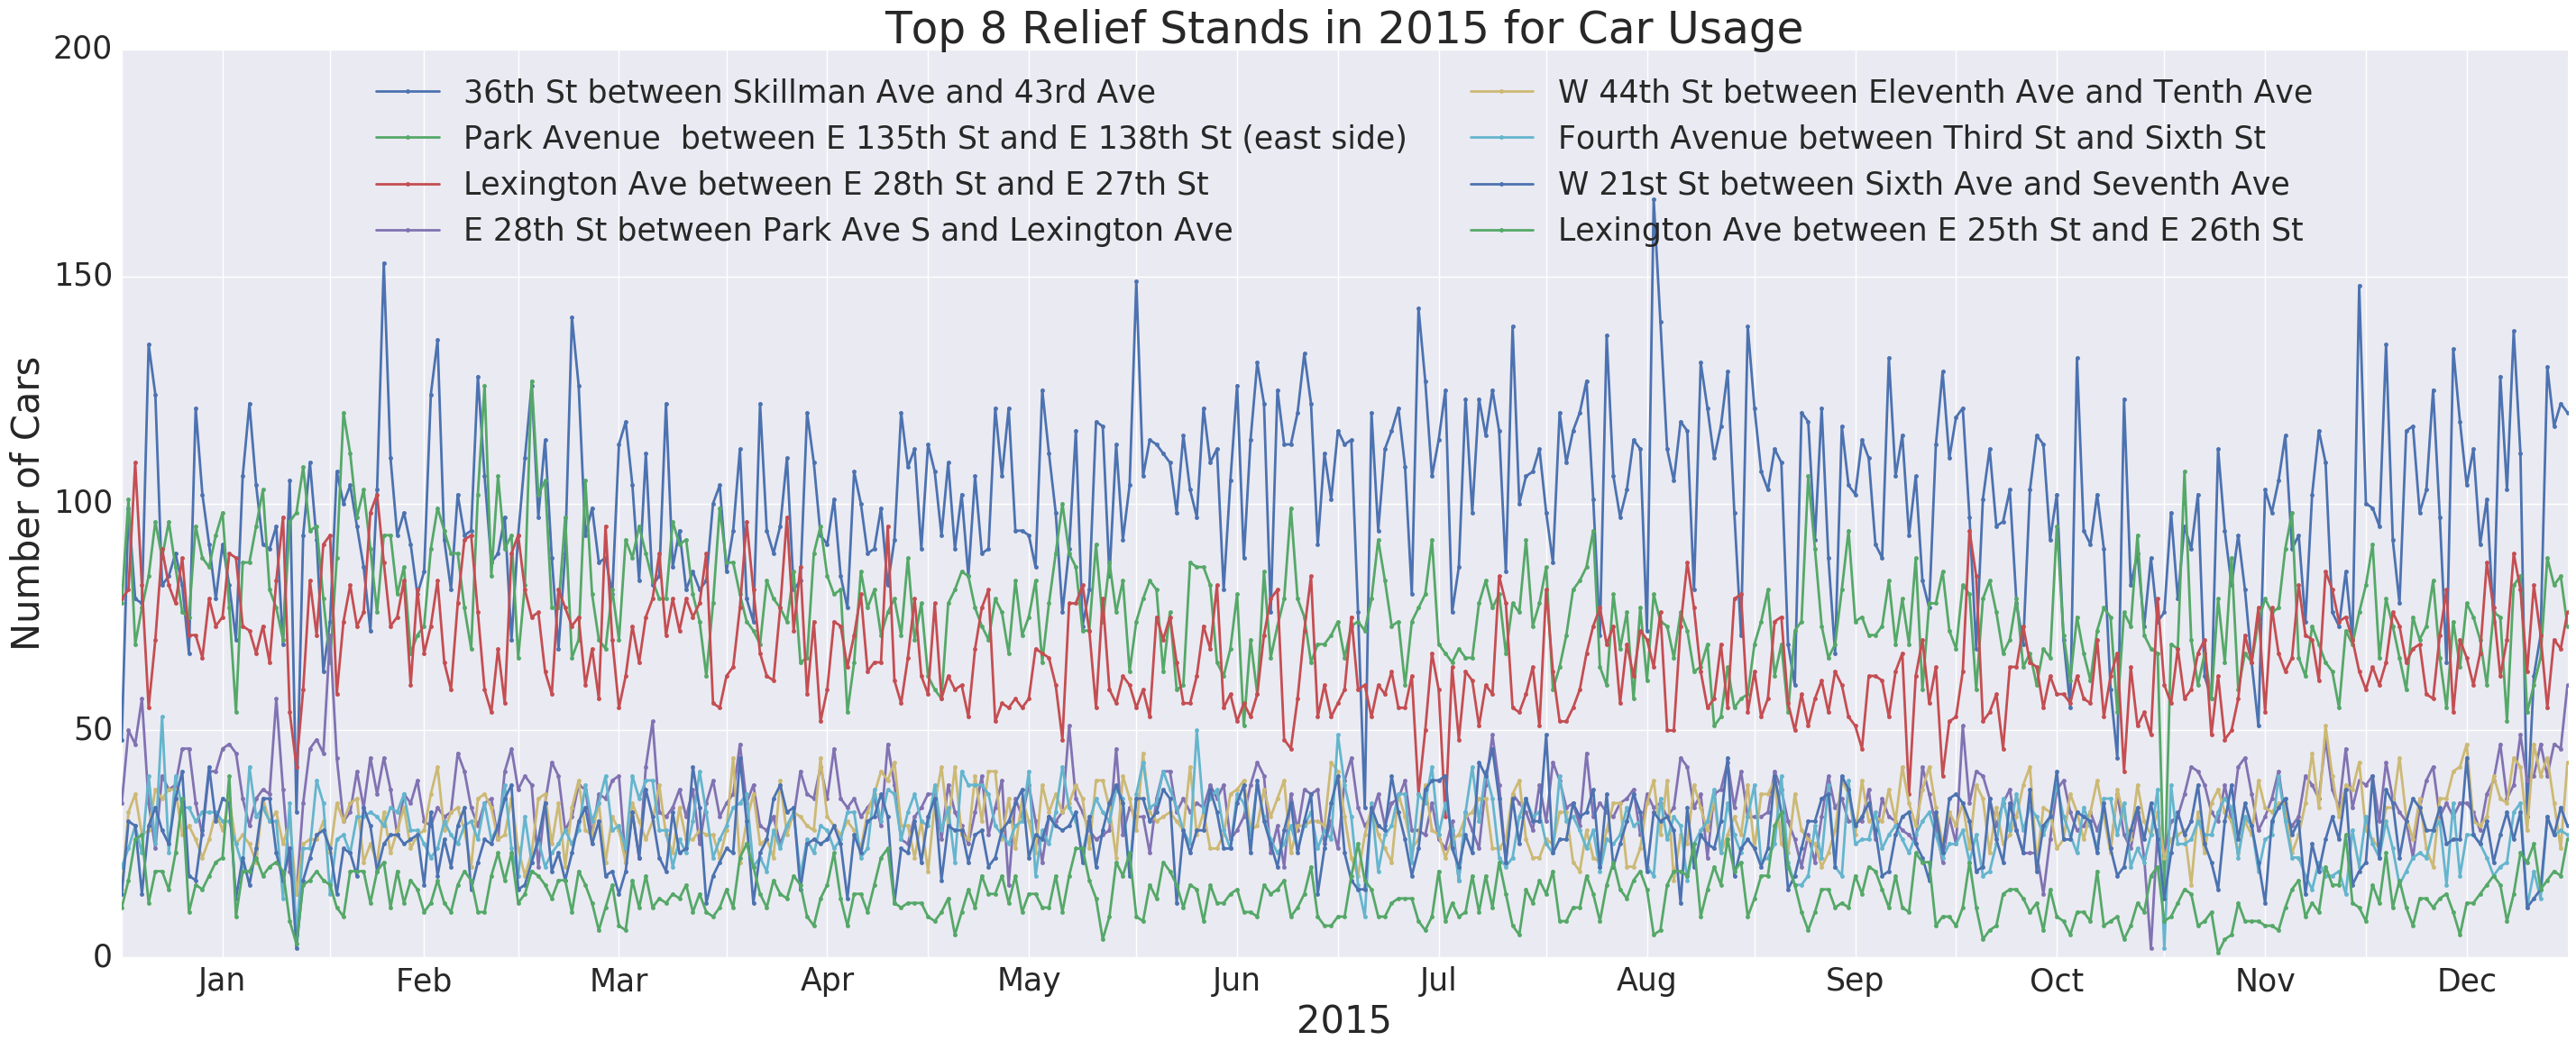

In [194]:
xsize = 35
ysize = 13
xpos = range(365)
cc_ = []

fig6, ax6 = plt.subplots(num=5, figsize=[xsize, ysize])
for idx in car_top8_idx:
    axx = ax6.plot(xpos, relief_count.loc[relief_count.relief_stand_idx == idx, 'car_usage'],
             '.-', lw=2,
             label=relief.loc[idx, 'location'])
    cc_.append(axx[0].get_color())
plt.xticks(xtpos, xtlab, fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(0, 200)
plt.xlim(0,364)
plt.ylabel('Number of Cars', fontsize=30)
plt.xlabel('2015', fontsize=30)
plt.title('Top 8 Relief Stands in 2015 for Car Usage', fontsize=35)

plt.legend(loc=9, ncol=2, fontsize=25)
fig6.savefig(image_path+'Top8_Cars_2015.png', bbox_inches='tight')
plt.show()    

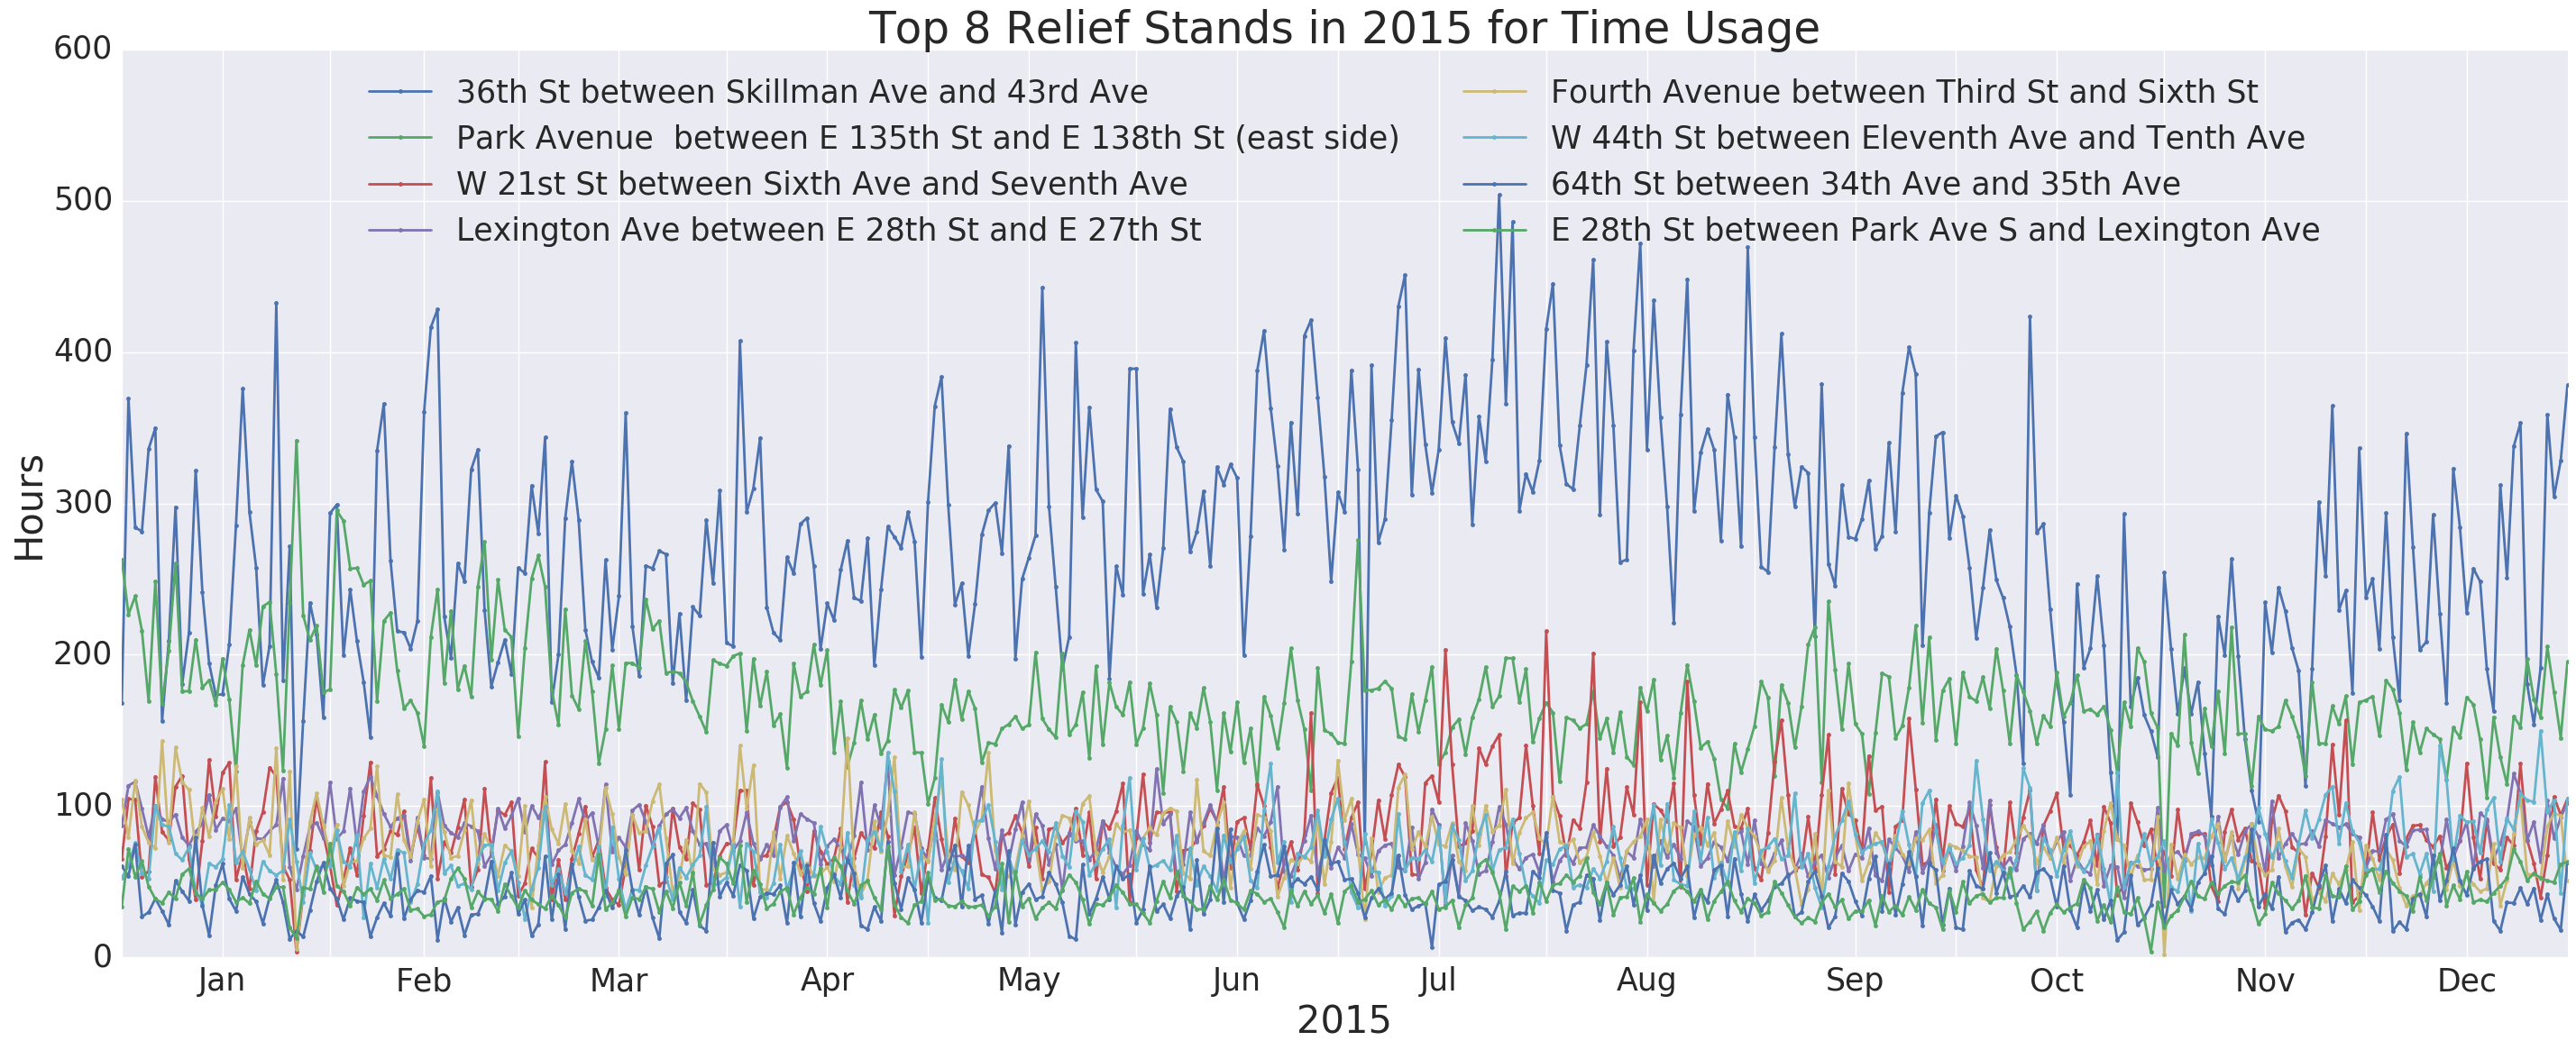

In [195]:
xsize = 35
ysize = 13
xpos = range(365)

fig7, ax7 = plt.subplots(num=6, figsize=[xsize, ysize])
for idx in time_top8_idx:
    ax7.plot(xpos, relief_count.loc[relief_count.relief_stand_idx == idx, 'time_usage'].apply(lambda x: x/3600),
             '.-', lw=2,
             label=relief.loc[idx, 'location'])
plt.xticks(xtpos, xtlab, fontsize=25)
plt.yticks(fontsize=25)
#plt.ylim(0, 200)
plt.xlim(0,364)
plt.ylabel('Hours', fontsize=30)
plt.xlabel('2015', fontsize=30)
plt.title('Top 8 Relief Stands in 2015 for Time Usage', fontsize=35)

plt.legend(loc=9, ncol=2, fontsize=25)
fig7.savefig(image_path+'Top8_Time_2015.png', bbox_inches='tight')
plt.show()    

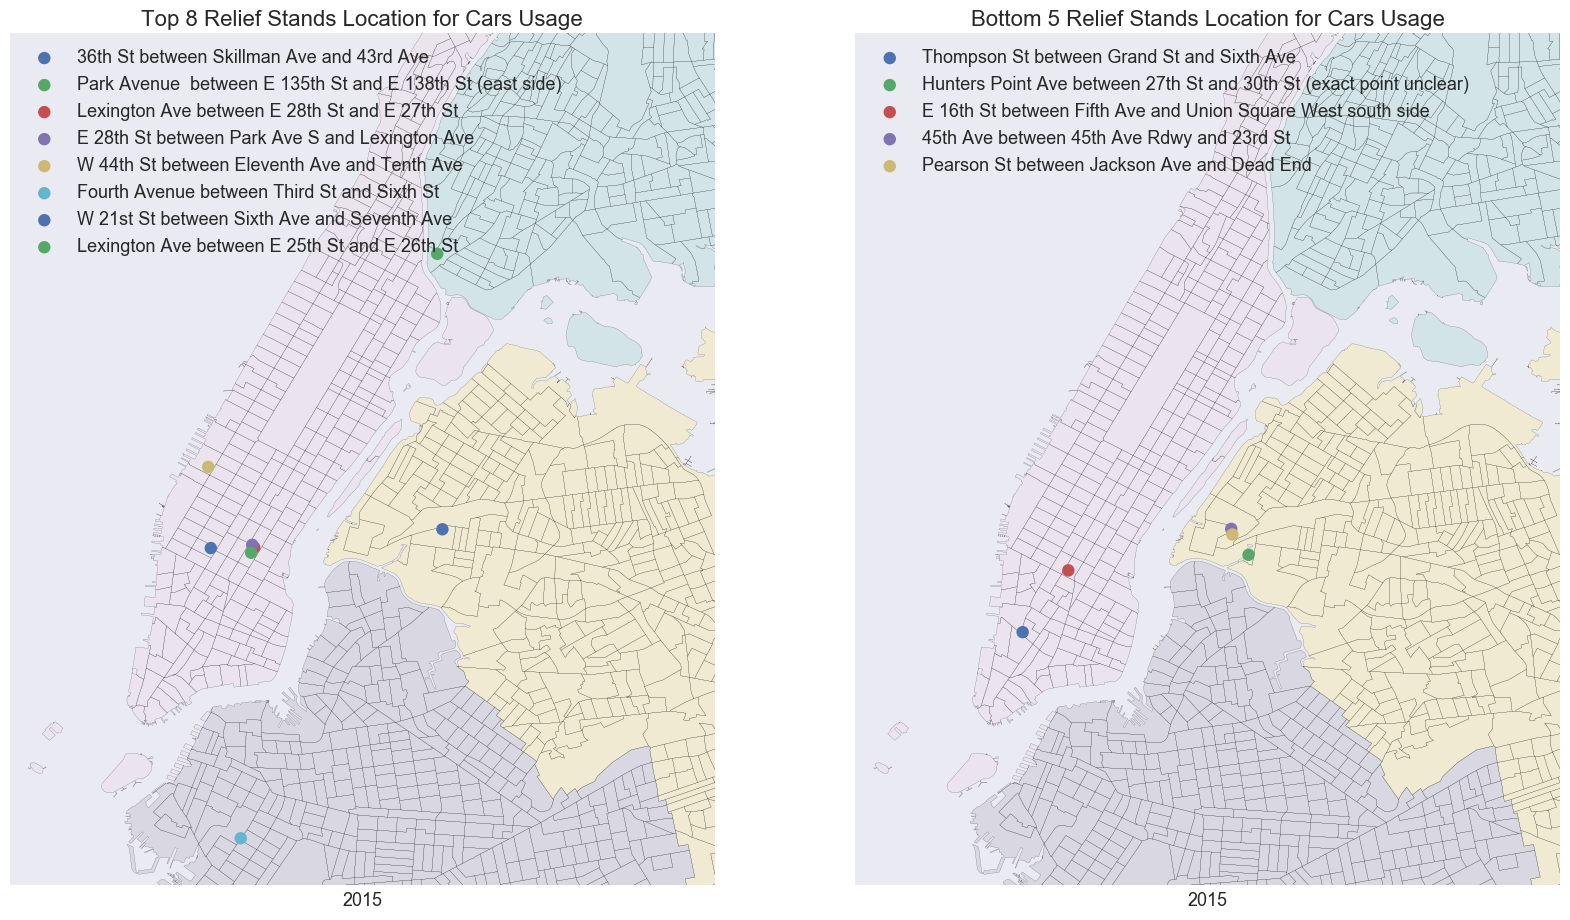

In [211]:
fig8, (ax8_0, ax8_1) = plt.subplots(1,2, num=7, figsize=(20,11))
ct_shape_.plot(ax=ax8_0, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)
ct_shape_.plot(ax=ax8_1, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

for k,idx in enumerate(car_top8_idx):
    p = relief.loc[idx, 'geometry']
    ax8_0.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax8_0.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax8_0.set_title('Top 8 Relief Stands Location for Cars Usage', fontsize=16)
ax8_0.set_xlim(-74.053, -73.85)
ax8_0.set_ylim(40.662, 40.865)
ax8_0.set_xlabel('2015', fontsize=13)
ax8_0.set_xticks([])
ax8_0.set_yticks([])

for k,idx in enumerate(car_last5_idx):
    p = relief.loc[idx, 'geometry']
    ax8_1.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax8_1.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax8_1.set_title('Bottom 5 Relief Stands Location for Cars Usage', fontsize=16)
ax8_1.set_xlim(-74.053, -73.85)
ax8_1.set_ylim(40.662, 40.865)
ax8_1.set_xlabel('2015', fontsize=13)
ax8_1.set_xticks([])
ax8_1.set_yticks([])

plt.xticks([])
plt.yticks([])
fig8.savefig(image_path+'Cars_Usage_Location.png', bbox_inches='tight')
plt.show()

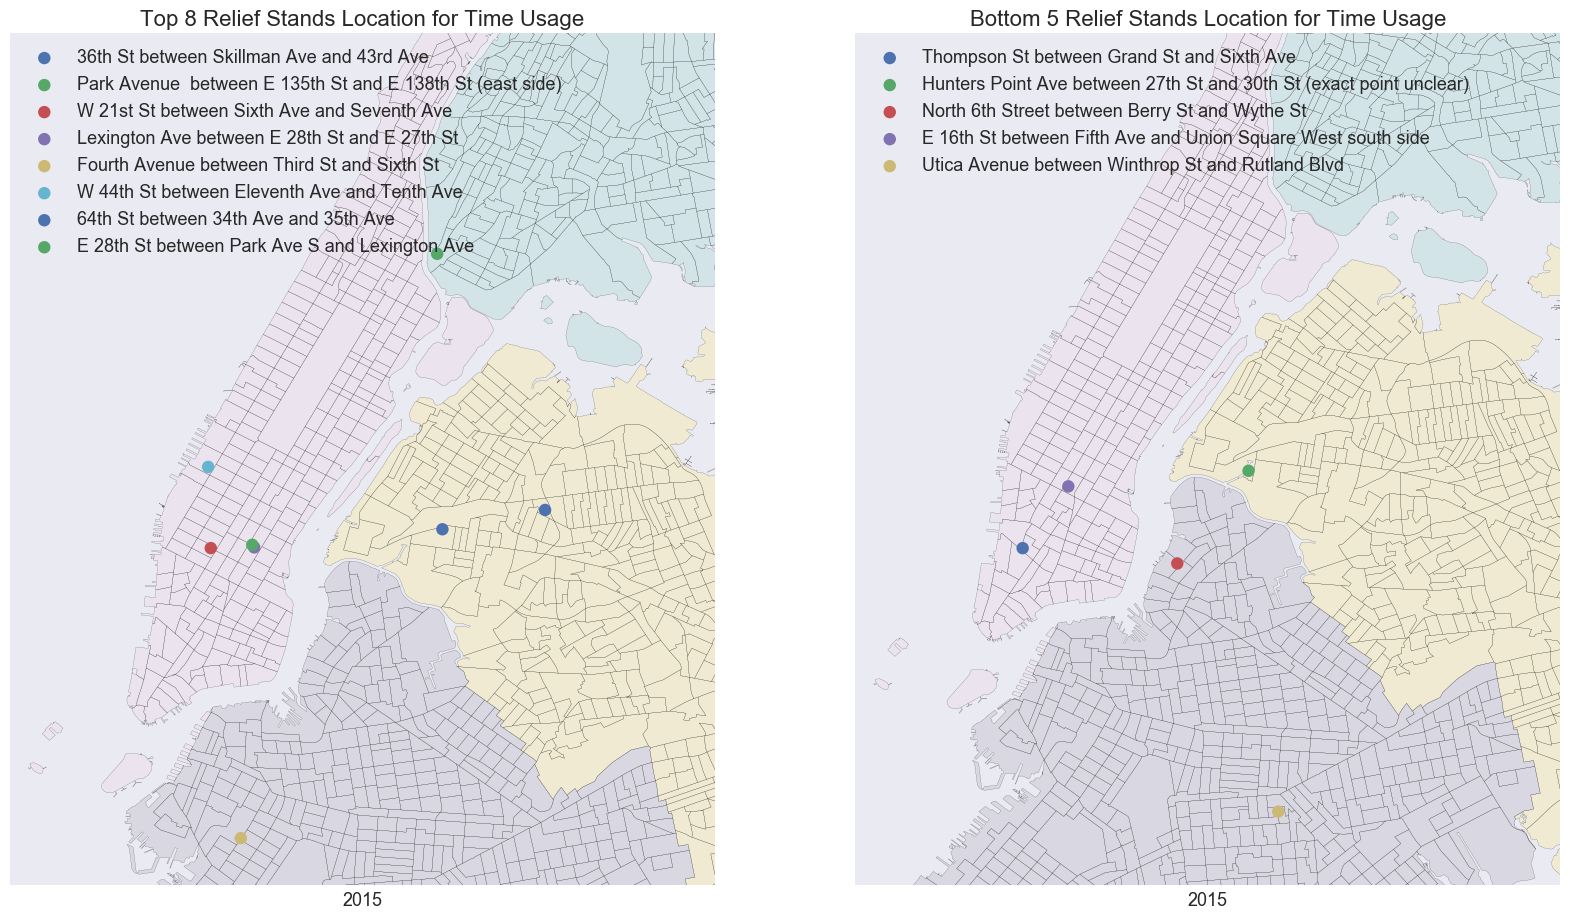

In [216]:
fig9, (ax9_0, ax9_1) = plt.subplots(1,2, num=8, figsize=(20,11))
ct_shape_.plot(ax=ax9_0, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)
ct_shape_.plot(ax=ax9_1, column='BoroName', cmap=plt.cm.Set3, linewidth=0.1, alpha=0.25, zorder=1)

for k,idx in enumerate(time_top8_idx):
    p = relief.loc[idx, 'geometry']
    ax9_0.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax9_0.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax9_0.set_title('Top 8 Relief Stands Location for Time Usage', fontsize=16)
ax9_0.set_xlim(-74.053, -73.85)
ax9_0.set_ylim(40.662, 40.865)
ax9_0.set_xlabel('2015', fontsize=13)
ax9_0.set_xticks([])
ax9_0.set_yticks([])

for k,idx in enumerate(time_last5_idx):
    p = relief.loc[idx, 'geometry']
    ax9_1.scatter(p.x, p.y, marker='o', s=80, c=cc_[k], edgecolor='none', zorder=2, alpha=1,
                label= relief.loc[idx, 'location'])
ax9_1.legend(scatterpoints=1, loc=2, shadow=True, fontsize=13)
ax9_1.set_title('Bottom 5 Relief Stands Location for Time Usage', fontsize=16)
ax9_1.set_xlim(-74.053, -73.85)
ax9_1.set_ylim(40.642, 40.845)
ax9_1.set_xlabel('2015', fontsize=13)
ax9_1.set_xticks([])
ax9_1.set_yticks([])

plt.xticks([])
plt.yticks([])
fig9.savefig(image_path+'Time_Usage_Location.png', bbox_inches='tight')
plt.show()

In [ ]:
-73.931179 40.6595